In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [93]:
data = pd.read_csv('netflix_titles.csv')
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [94]:
data.shape

(7787, 12)

In [95]:
df = data.copy()

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [97]:
df.isnull().sum()

show_id        0
type           0
              ..
listed_in      0
description    0
Length: 12, dtype: int64

<AxesSubplot:ylabel='type'>

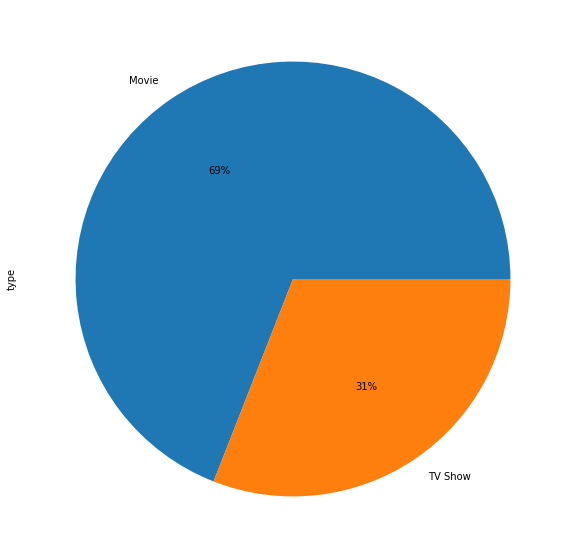

In [98]:
plt.figure(figsize=(10, 10))
df['type'].value_counts().plot(kind='pie',autopct='%1.0f%%')

In [99]:
df['type'].value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

In [100]:
df['director'].nunique()

4049

In [101]:
df['director'].value_counts()

Raúl Campos, Jan Suter    18
Marcus Raboy              16
                          ..
Fumihiko Sori              1
Yen Cheng-kuo              1
Name: director, Length: 4049, dtype: int64

In [102]:
df['country'].nunique()

681

In [103]:
df['country'].value_counts()

United States                                      2555
India                                               923
                                                   ... 
United States, Australia, Samoa, United Kingdom       1
Australia, India                                      1
Name: country, Length: 681, dtype: int64

In [104]:
values = df['country'].value_counts()[:10].tolist()
labels = df['country'].value_counts()[:10].index.tolist()

In [105]:
print(labels)

['United States', 'India', 'United Kingdom', 'Japan', 'South Korea', 'Canada', 'Spain', 'France', 'Egypt', 'Mexico']


Text(0.5, 1.0, 'Top 10 countries with movies and tv shows')

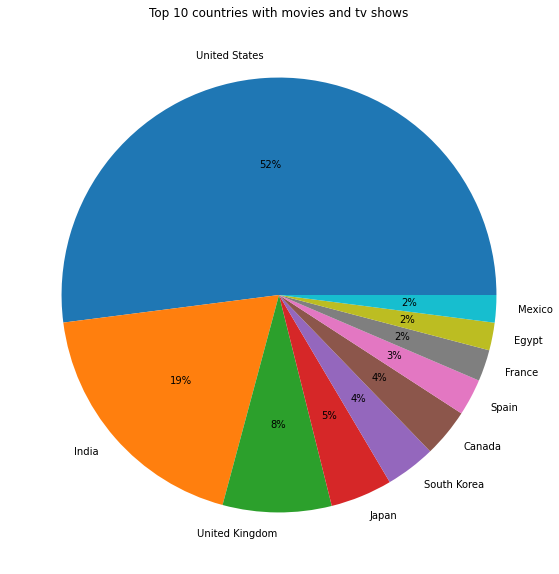

In [106]:
plt.figure(figsize=(10, 10))
plt.pie(values,labels=labels,autopct='%1.0f%%')
plt.title('Top 10 countries with movies and tv shows')

Text(0.5, 1.0, 'Top 10 countries with movies')

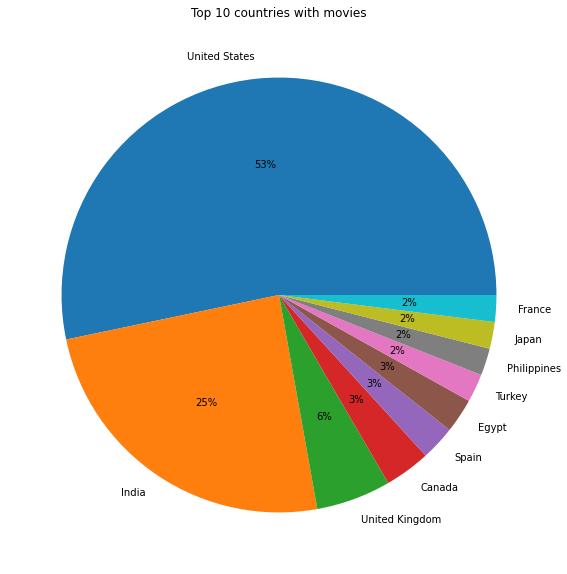

In [107]:
m = df[df['type']=='Movie']
m_values = m['country'].value_counts()[:10].tolist()
m_labels = m['country'].value_counts()[:10].index.tolist()

plt.figure(figsize=(10, 10))
plt.pie(m_values,labels=m_labels,autopct='%1.0f%%')
plt.title('Top 10 countries with movies')

C:\Users\aurorarch\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


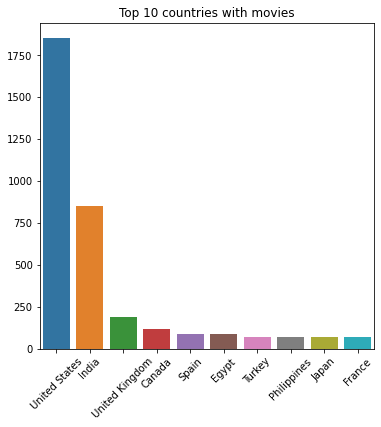

In [108]:
plt.figure(figsize=(6,6))
sns.barplot(m_labels,m_values)
plt.xticks(rotation=45)
plt.title('Top 10 countries with movies')
plt.show()

In [109]:
df['rating'].value_counts()

TV-MA    2863
TV-14    1931
         ... 
UR          5
NC-17       3
Name: rating, Length: 14, dtype: int64

In [110]:
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])

In [111]:
#new dataframe with year in new column
date = pd.DataFrame(df['date_added'])
added = date['date_added'].str.split(', ',expand = True)
date['MD'] = added[0]
date['Year'] = added[1]
date.head()

,date_added,MD,Year
0,"August 14, 2020",August 14,2020
1,"December 23, 2016",December 23,2016
2,"December 20, 2018",December 20,2018
3,"November 16, 2017",November 16,2017
4,"January 1, 2020",January 1,2020


In [112]:
def get_month(row):
    mon = row['MD'].split(' ')
    print(mon)
    if len(mon) == 2:
        return mon[0]
    else:
        return mon[1]

In [113]:
def get_day(row):
    mon = row['MD'].split(' ')
    if len(mon) == 2:
        return mon[1]
    else:
        return mon[2]

In [ ]:
# some of the Month-day combo was having ' November 1' extra space. So created a function to split the month and day from it and apply it on each row
date['Month'] = date.apply(get_month,axis=1)
date['Day'] = date.apply(get_day,axis=1)

In [115]:
date = date.drop(['date_added','MD'], axis=1, errors='ignore')

In [116]:
date.head()

,Year,Month,Day
0,2020,August,14
1,2016,December,23
2,2018,December,20
3,2017,November,16
4,2020,January,1


In [117]:
df.shape

(7787, 12)

In [118]:
date.shape

(7787, 3)

In [119]:
df = pd.concat([df, date],axis=1)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Year,Month,Day
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,August,14
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,December,23
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,December,20
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,November,16
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,January,1


C:\Users\aurorarch\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


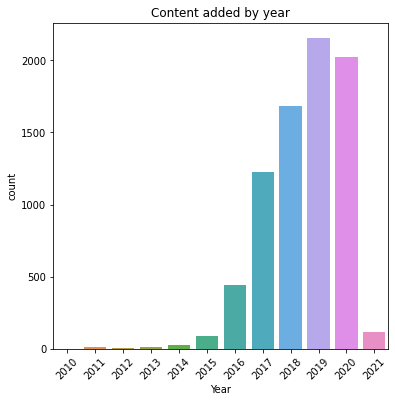

In [120]:
plt.figure(figsize=(6,6))
sns.countplot(df['Year'],order=['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021'])
plt.xticks(rotation=45)
plt.title('Content added by year')
plt.show()

In [121]:
d = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}
df['Month'] = df['Month'].map(d).astype('Int8')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Year,Month,Day
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,14
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,23
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,20
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,16
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,1


In [122]:
import datetime

def get_weekdays(x):
    t = datetime.datetime(int(x['Year']), int(x['Month']), int(x['Day']))
    return t.weekday()

df['WeekDay'] = df.apply(get_weekdays,axis=1)

In [123]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Year,Month,Day,WeekDay
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,14,4
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,23,4
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,20,3
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,16,3
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,1,2


In [124]:
df['WeekDay'].value_counts()

4    2287
3    1147
     ... 
5     731
6     708
Name: WeekDay, Length: 7, dtype: int64

In [125]:
df.isnull().sum()

show_id    0
type       0
          ..
Day        0
WeekDay    0
Length: 16, dtype: int64

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7787 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
 12  Year          7787 non-null   object
 13  Month         7787 non-null   Int8  
 14  Day           7787 non-null   object
 15  WeekDay       7787 non-null   int64 
dtypes: Int8(1), int64(2), object(13)
memory usage: 927.9+ KB


In [127]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Year,Month,Day,WeekDay
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,14,4
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,23,4
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,20,3
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,16,3
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,1,2


C:\Users\aurorarch\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Day', ylabel='count'>

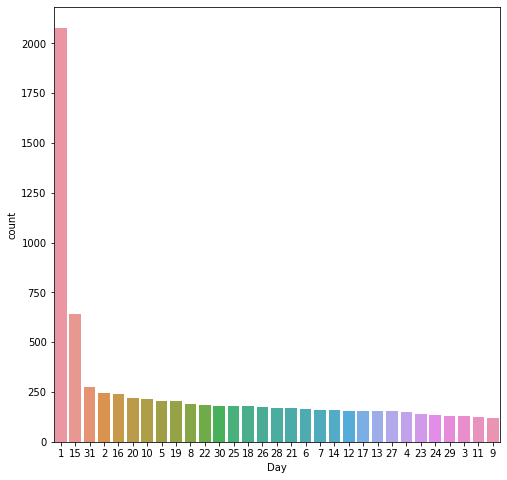

In [128]:
plt.figure(figsize=(8,8))
sns.countplot(df['Day'],order = df['Day'].value_counts().index)

C:\Users\aurorarch\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='WeekDay', ylabel='count'>

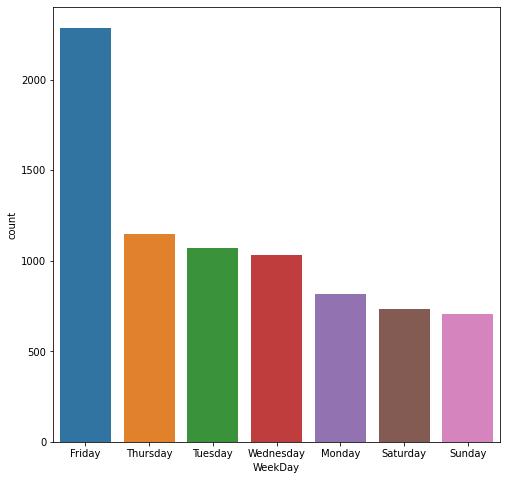

In [129]:
plt.figure(figsize=(8,8))
d = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
x = df['WeekDay'].map(d)
sns.countplot(x,order = x.value_counts().index)

In [130]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Year,Month,Day,WeekDay
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,14,4
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,23,4
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,20,3
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,16,3
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,1,2
